In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import os
import yaml

In [22]:
 #build pulse fidelity dict
fidelities: dict[float, float] = {}
for file in os.listdir('../output/sim_results'):
    if file.endswith('yaml'):
        try:
            with open(f'../output/sim_results/{file}', 'r') as yamlfile:
                gate_info = yaml.safe_load(yamlfile)
                for gate_name, gate_stats in gate_info.items():
                    tg = gate_stats['pulse_config']['tg']
                    fidelity = gate_stats['fidelity']
                    fidelities[tg]=fidelity
        except Exception as exc:
            print(exc)
       

could not determine a constructor for the tag 'tag:yaml.org,2002:python/complex'
  in "../output/sim_results/CZ-10ns_tg-0.1ns_tramp-pulse_gen_ct-mp.yaml", line 24, column 13


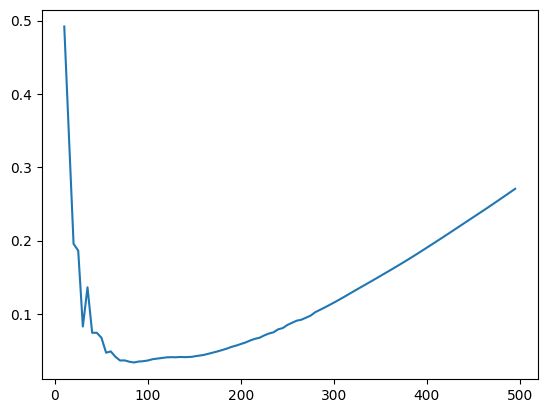

In [32]:
fidelity_lst = sorted(fidelities.items())
tgs, fs = zip(*fidelity_lst)
err = 1 - np.array(fs)
plt.plot(tgs, err)